In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## IMDB Cleaning

Import all the data

Note: you need to download these files from the imdb dataset website:

title.basics.tsv.gz

title.ratings.tsv.gz

names.basics.tsv.gz

title.principals.tsv.gz

title.crew.tsv.gz

In [5]:
titles_imdb = pd.read_csv('../data/title.basics.tsv.gz', sep='\t', compression='gzip')
ratings_imdb = pd.read_csv('../data/title.ratings.tsv.gz', sep='\t', compression='gzip')
name_imdb = pd.read_csv('../data/name.basics.tsv.gz', sep='\t', compression='gzip')
crew_imdb = pd.read_csv('../data/title.crew.tsv.gz', sep='\t', compression='gzip')
name_movies_imdb = pd.read_csv('../data/title.principals.tsv.gz', sep='\t', compression='gzip')
kaggle = pd.read_csv('../data/kaggle_movies_metadata.csv')

/var/folders/g4/ttsfd72s5qn1w8w3x92b3yyw0000gn/T/ipykernel_90660/1765407425.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titles_imdb = pd.read_csv('../data/title.basics.tsv.gz', sep='\t', compression='gzip')
/var/folders/g4/ttsfd72s5qn1w8w3x92b3yyw0000gn/T/ipykernel_90660/1765407425.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  kaggle = pd.read_csv('../data/kaggle_movies_metadata.csv')


In [6]:
titles_imdb.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [7]:
ratings_imdb.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1922
1,tt0000002,5.8,259
2,tt0000003,6.5,1734
3,tt0000004,5.6,174
4,tt0000005,6.2,2545


In [8]:
name_imdb.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0072308,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0117057,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0057345,tt0049189,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0072562,tt0077975,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0060827,tt0050986,tt0050976"


In [9]:
crew_imdb.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [10]:
name_movies_imdb.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


### Name, Movie and Actor/Actress Dataset

limit the dataset to only actor/actresses, their name ids and movie ids

In [11]:
actor = name_movies_imdb.loc[name_movies_imdb['category'] == 'actor']
actress = name_movies_imdb.loc[name_movies_imdb['category'] == 'actress']

In [12]:
actor_actress = pd.concat([actor, actress])

In [13]:
actor_actress = actor_actress[['tconst', 'nconst', 'category']]
actor_actress

,tconst,nconst,category
11,tt0000005,nm0443482,actor
12,tt0000005,nm0653042,actor
16,tt0000007,nm0179163,actor
17,tt0000007,nm0183947,actor
21,tt0000008,nm0653028,actor
...,...,...,...
53497038,tt9916856,nm3394271,actress
53497039,tt9916856,nm10538650,actress
53497041,tt9916856,nm10538647,actress
53497047,tt9916880,nm0254176,actress


### Merge with dataset containing the names of the actors/actresses

In [14]:
actor_actress_names = actor_actress.merge(name_imdb, 'inner', on='nconst')

In [15]:
# Limit to important features and rename name column
actor_actress_names = actor_actress_names[['tconst', 'category', 'primaryName']].rename(columns={'primaryName': 'ActorName'})
actor_actress_names

,tconst,category,ActorName
0,tt0000005,actor,Charles Kayser
1,tt0000005,actor,John Ott
2,tt0000007,actor,James J. Corbett
3,tt0003116,actor,James J. Corbett
4,tt0003730,actor,James J. Corbett
...,...,...,...
20926265,tt9916756,actress,Akia Barnes
20926266,tt9916756,actress,Autumn Barnes
20926267,tt9916756,actress,Lakeisha Barnes
20926268,tt9916856,actress,Anna Fitoussi


### Merge crew dataset containing director name ids with name dataset

In [16]:
directors = name_imdb.merge(crew_imdb, 'inner', left_on='nconst', right_on='directors')

In [17]:
directors = directors[['primaryName', 'tconst']].rename(columns={'primaryName': 'Director'})
directors

,Director,tconst
0,Ingmar Bergman,tt0038468
1,Ingmar Bergman,tt0038675
2,Ingmar Bergman,tt0039834
3,Ingmar Bergman,tt0040418
4,Ingmar Bergman,tt0040622
...,...,...
4378043,Chinmay Mishra,tt18361688
4378044,Chinmay Mishra,tt18687502
4378045,Ibrahim-Aloduley,tt8744160
4378046,Eli Bevins,tt9046122


### Merge ratings dataset with movie title dataset

In [18]:
ratings_titles = titles_imdb.merge(ratings_imdb, how='inner')

In [19]:
# remove unnecessary features and limit the titles dataset to only movies
movie_rating = ratings_titles.loc[ratings_titles['titleType'] == 'movie'][['tconst', 'primaryTitle', 'startYear', 'genres', 'averageRating', 'numVotes']]
movie_rating

,tconst,primaryTitle,startYear,genres,averageRating,numVotes
8,tt0000009,Miss Jerry,1894,Romance,5.2,200
325,tt0000502,Bohemios,1905,\N,4.2,14
357,tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,794
364,tt0000591,The Prodigal Son,1907,Drama,5.1,20
378,tt0000615,Robbery Under Arms,1907,Drama,4.3,23
...,...,...,...,...,...,...
1246380,tt9916270,Il talento del calabrone,2020,Thriller,5.8,1371
1246383,tt9916362,Coven,2020,"Drama,History",6.4,4978
1246387,tt9916428,The Secret of China,2019,"Adventure,History,War",3.8,14
1246390,tt9916538,Kuambil Lagi Hatiku,2019,Drama,8.3,6


### Merge the three datasets we created above to obtain a dataset containing all the needed movie features

In [20]:
# Director merge
merge1 = movie_rating.merge(directors, 'inner', on='tconst')

In [21]:
merge1

,tconst,primaryTitle,startYear,genres,averageRating,numVotes,Director
0,tt0000009,Miss Jerry,1894,Romance,5.2,200,Alexander Black
1,tt0000502,Bohemios,1905,\N,4.2,14,Ricardo de Baños
2,tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,794,Charles Tait
3,tt0000591,The Prodigal Son,1907,Drama,5.1,20,Michel Carré
4,tt0000615,Robbery Under Arms,1907,Drama,4.3,23,Charles MacMahon
...,...,...,...,...,...,...,...
253627,tt9916270,Il talento del calabrone,2020,Thriller,5.8,1371,Giacomo Cimini
253628,tt9916362,Coven,2020,"Drama,History",6.4,4978,Pablo Agüero
253629,tt9916428,The Secret of China,2019,"Adventure,History,War",3.8,14,Jixing Wang
253630,tt9916538,Kuambil Lagi Hatiku,2019,Drama,8.3,6,Azhar Kinoi Lubis


In [22]:
# above merge with actor names
data = merge1.merge(actor_actress_names, 'inner', on='tconst')

In [23]:
data

,tconst,primaryTitle,startYear,genres,averageRating,numVotes,Director,category,ActorName
0,tt0000009,Miss Jerry,1894,Romance,5.2,200,Alexander Black,actor,William Courtenay
1,tt0000009,Miss Jerry,1894,Romance,5.2,200,Alexander Black,actor,Chauncey Depew
2,tt0000009,Miss Jerry,1894,Romance,5.2,200,Alexander Black,actress,Blanche Bayliss
3,tt0000502,Bohemios,1905,\N,4.2,14,Ricardo de Baños,actor,Antonio del Pozo
4,tt0000502,Bohemios,1905,\N,4.2,14,Ricardo de Baños,actor,El Mochuelo
...,...,...,...,...,...,...,...,...,...
983742,tt9916538,Kuambil Lagi Hatiku,2019,Drama,8.3,6,Azhar Kinoi Lubis,actress,Lala Karmela
983743,tt9916730,6 Gunn,2017,\N,9.2,7,Kiran Gawade,actor,Sunil Barve
983744,tt9916730,6 Gunn,2017,\N,9.2,7,Kiran Gawade,actor,Bhushan Pradhan
983745,tt9916730,6 Gunn,2017,\N,9.2,7,Kiran Gawade,actor,Devadhar Archit


In [24]:
# replace /N with nan
data_nan = data.replace(r'\N', np.nan)

In [25]:
data_nan

,tconst,primaryTitle,startYear,genres,averageRating,numVotes,Director,category,ActorName
0,tt0000009,Miss Jerry,1894,Romance,5.2,200,Alexander Black,actor,William Courtenay
1,tt0000009,Miss Jerry,1894,Romance,5.2,200,Alexander Black,actor,Chauncey Depew
2,tt0000009,Miss Jerry,1894,Romance,5.2,200,Alexander Black,actress,Blanche Bayliss
3,tt0000502,Bohemios,1905,NaN,4.2,14,Ricardo de Baños,actor,Antonio del Pozo
4,tt0000502,Bohemios,1905,NaN,4.2,14,Ricardo de Baños,actor,El Mochuelo
...,...,...,...,...,...,...,...,...,...
983742,tt9916538,Kuambil Lagi Hatiku,2019,Drama,8.3,6,Azhar Kinoi Lubis,actress,Lala Karmela
983743,tt9916730,6 Gunn,2017,NaN,9.2,7,Kiran Gawade,actor,Sunil Barve
983744,tt9916730,6 Gunn,2017,NaN,9.2,7,Kiran Gawade,actor,Bhushan Pradhan
983745,tt9916730,6 Gunn,2017,NaN,9.2,7,Kiran Gawade,actor,Devadhar Archit


In [26]:
# NaN percentage for dataset on each column
data_nan.isnull().sum() * 100 / data_nan.shape[0]

tconst           0.000000
primaryTitle     0.000000
startYear        0.017078
genres           3.717419
averageRating    0.000000
numVotes         0.000000
Director         0.000000
category         0.000000
ActorName        0.000000
dtype: float64

In [27]:
# Maybe we can not include birthyear as it is primarily nan
data_no_nan = data_nan.dropna(axis=0, how='any')
data_no_nan

,tconst,primaryTitle,startYear,genres,averageRating,numVotes,Director,category,ActorName
0,tt0000009,Miss Jerry,1894,Romance,5.2,200,Alexander Black,actor,William Courtenay
1,tt0000009,Miss Jerry,1894,Romance,5.2,200,Alexander Black,actor,Chauncey Depew
2,tt0000009,Miss Jerry,1894,Romance,5.2,200,Alexander Black,actress,Blanche Bayliss
5,tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,794,Charles Tait,actor,John Tait
6,tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,794,Charles Tait,actor,Nicholas Brierley
...,...,...,...,...,...,...,...,...,...
983738,tt9916428,The Secret of China,2019,"Adventure,History,War",3.8,14,Jixing Wang,actress,Wenli Jiang
983739,tt9916538,Kuambil Lagi Hatiku,2019,Drama,8.3,6,Azhar Kinoi Lubis,actor,Sahil Shah
983740,tt9916538,Kuambil Lagi Hatiku,2019,Drama,8.3,6,Azhar Kinoi Lubis,actress,Ria Irawan
983741,tt9916538,Kuambil Lagi Hatiku,2019,Drama,8.3,6,Azhar Kinoi Lubis,actress,Cut Mini Theo


In [28]:
data_no_nan.to_csv('../data/imdb_no_nan.csv')

### Kaggle dataset cleaning to add revenue and budget

In [32]:
kaggle = kaggle[['imdb_id', 'budget', 'release_date', 'revenue']]
kaggle

,imdb_id,budget,release_date,revenue
0,tt0114709,30000000,1995-10-30,373554033.0
1,tt0113497,65000000,1995-12-15,262797249.0
2,tt0113228,0,1995-12-22,0.0
3,tt0114885,16000000,1995-12-22,81452156.0
4,tt0113041,0,1995-02-10,76578911.0
...,...,...,...,...
45461,tt6209470,0,NaN,0.0
45462,tt2028550,0,2011-11-17,0.0
45463,tt0303758,0,2003-08-01,0.0
45464,tt0008536,0,1917-10-21,0.0


In [48]:
kaggle['budget'] = kaggle['budget'].replace('0', np.nan)
kaggle['revenue'] = kaggle['revenue'].replace(0.0, np.nan)
kaggle

,imdb_id,budget,release_date,revenue
0,tt0114709,30000000,1995-10-30,373554033.0
1,tt0113497,65000000,1995-12-15,262797249.0
2,tt0113228,NaN,1995-12-22,NaN
3,tt0114885,16000000,1995-12-22,81452156.0
4,tt0113041,NaN,1995-02-10,76578911.0
...,...,...,...,...
45461,tt6209470,NaN,NaN,NaN
45462,tt2028550,NaN,2011-11-17,NaN
45463,tt0303758,NaN,2003-08-01,NaN
45464,tt0008536,NaN,1917-10-21,NaN


In [37]:
# NaN percentage for dataset on each column
kaggle.isnull().sum() * 100 / kaggle.shape[0]

imdb_id          0.037391
budget          80.440329
release_date     0.191352
revenue         83.706506
dtype: float64

In [47]:
kaggle_no_nan = kaggle.dropna(axis=0, how='any')
kaggle_no_nan

,imdb_id,budget,release_date,revenue
0,tt0114709,30000000,1995-10-30,373554033.0
1,tt0113497,65000000,1995-12-15,262797249.0
3,tt0114885,16000000,1995-12-22,81452156.0
5,tt0113277,60000000,1995-12-15,187436818.0
8,tt0114576,35000000,1995-12-22,64350171.0
...,...,...,...,...
45250,tt0479751,12000000,2007-06-14,19000000.0
45399,tt3805180,750000,2014-06-05,3.0
45409,tt0933361,800000,2006-11-23,1328612.0
45412,tt1718881,2000000,2010-09-30,1268793.0


(array([492., 237., 610., 532., 209., 548., 204., 156., 243., 195., 185.,
        135.,  96., 108.,  99.,   7.,  13.,  20.,  44.,  51.,  40.,  21.,
         36., 110.,  48.,  14.,  29.,  14.,  34.,  12.,  20.,  58.,  31.,
         19.,  15.,  11.,  17.,  42.,  12.,   8.,   9.,  12.,  15.,  20.,
         11.,  11.,  16.,  22.,   9.,  14.,  15.,   8.,  19.,   7.,   8.,
         16.,   9.,   9.,  10.,  10.,  13.,   9.,  14.,  11.,  11.,  11.,
         16.,   7.,  16.,   7.,   7.,  10.,  10.,   9.,   8.,   7.,   7.,
          8.,  10.,   7.,   9.,  10.,   7.,   8.,   8.,   8.,  11.,   7.,
         10.,   7.,   7.,   7.,   7.,   7.,   7.,   8.,   7.,   7.,   8.,
          8.]),
 array([  0.  ,   7.03,  14.06,  21.09,  28.12,  35.15,  42.18,  49.21,
         56.24,  63.27,  70.3 ,  77.33,  84.36,  91.39,  98.42, 105.45,
        112.48, 119.51, 126.54, 133.57, 140.6 , 147.63, 154.66, 161.69,
        168.72, 175.75, 182.78, 189.81, 196.84, 203.87, 210.9 , 217.93,
        224.96, 231.99, 239.02

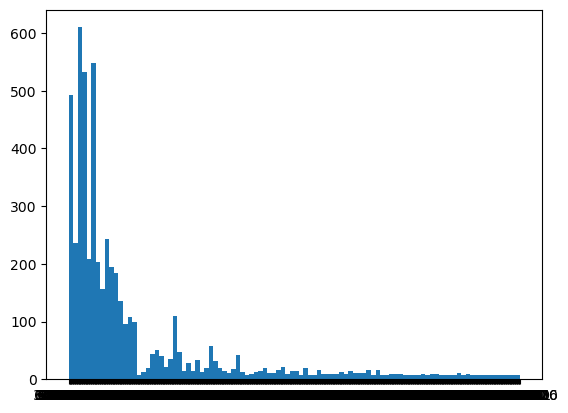

In [46]:
plt.hist(kaggle_no_nan['budget'], bins=100)

Budgets are are highly unreliable as most do not have a value or they have an unrealistic budget.  Same goes for revenue.

### Merging the imdb dataset with the kaggle dataset to add revenues

In [49]:
imdb_budgets = data_no_nan.merge(kaggle, 'inner', left_on='tconst', right_on='imdb_id')

In [50]:
imdb_budgets

,tconst,primaryTitle,startYear,genres,averageRating,numVotes,Director,category,ActorName,birthYear,imdb_id,budget,release_date,revenue
0,tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,794,Charles Tait,actor,John Tait,1871,tt0000574,NaN,1906-12-26,NaN
1,tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,794,Charles Tait,actor,Nicholas Brierley,1880,tt0000574,NaN,1906-12-26,NaN
2,tt0000574,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,794,Charles Tait,actress,Elizabeth Tait,1879,tt0000574,NaN,1906-12-26,NaN
3,tt0002101,Cleopatra,1912,"Drama,History",5.1,536,Charles L. Gaskill,actor,James R. Waite,1845,tt0002101,NaN,1912-11-13,NaN
4,tt0002101,Cleopatra,1912,"Drama,History",5.1,536,Charles L. Gaskill,actor,Charles Sindelar,1876,tt0002101,NaN,1912-11-13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116202,tt6830780,Lucid Dream,2017,"Sci-Fi,Thriller",6.1,3764,Joon-Sung Kim,actor,Sol Kyung-gu,1968,tt6830780,5000000,2017-02-22,NaN
116203,tt6830780,Lucid Dream,2017,"Sci-Fi,Thriller",6.1,3764,Joon-Sung Kim,actor,Ho-jin Chun,1960,tt6830780,5000000,2017-02-22,NaN
116204,tt6830780,Lucid Dream,2017,"Sci-Fi,Thriller",6.1,3764,Joon-Sung Kim,actor,Go Soo,1978,tt6830780,5000000,2017-02-22,NaN
116205,tt6830780,Lucid Dream,2017,"Sci-Fi,Thriller",6.1,3764,Joon-Sung Kim,actor,Yu Chun Park,1986,tt6830780,5000000,2017-02-22,NaN


In [51]:
imdb_budgets.to_csv('../data/imdb_budgets.csv')

In [53]:
imdb_budgets.groupby('ActorName').count()

,tconst,primaryTitle,startYear,genres,averageRating,numVotes,Director,category,birthYear,imdb_id,budget,release_date,revenue
ActorName,,,,,,,,,,,,,
'Little Billy' Rhodes,1,1,1,1,1,1,1,1,1,1,0,1,0
'Weird Al' Yankovic,1,1,1,1,1,1,1,1,1,1,1,1,0
50 Cent,9,9,9,9,9,9,9,9,9,9,8,9,4
A Martinez,3,3,3,3,3,3,3,3,3,3,0,3,0
A. Michael Baldwin,4,4,4,4,4,4,4,4,4,4,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ümit Acar,1,1,1,1,1,1,1,1,1,1,1,1,0
Ünal Gürel,3,3,3,3,3,3,3,3,3,3,0,3,0
Þorsteinn Bachmann,3,3,3,3,3,3,3,3,3,3,1,3,0
